# Escola de Dados - Python para inovação cívica

Os dados que usaremos nesse notebook pode ser encontrado em: [Candidatos - 2016](https://dadosabertos.tse.jus.br/dataset/candidatos-2016) e [Candidatos - 2020](https://dadosabertos.tse.jus.br/dataset/candidatos-2020-subtemas) disponível no Portal de Dados Abertos do Tribunal Superior Eleitoral.


Os dados também podem ser encontrados na pasta "Dados" deste repositório.


------
Pontos para aula:

- Quantas candidaturas para a Câmara de Vereadores houveram em cada ano agrupado por gênero ? 
- Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?
- Há correlação entre idade, gênero e custo da campanha?
- Visualização gráfica da distribuição da variável DS_COR_RACA em 2020

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
dados_pe_rn = glob.glob('base_dados/consulta*.csv')
print(dados_pe_rn)

['base_dados/consulta_cand_2020_PE.csv', 'base_dados/consulta_cand_2016_RN.csv', 'base_dados/consulta_cand_2020_RN.csv', 'base_dados/consulta_cand_2016_PE.csv']


In [3]:
lista_df = []

for dados_estado in dados_pe_rn:
    df_estado = pd.read_csv(dados_estado, sep=";", encoding='latin_1', na_values=['#NULO#'])
    lista_df.append(df_estado)

/tmp/ipykernel_71582/3963974159.py:4: DtypeWarning: Columns (19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df_estado = pd.read_csv(dados_estado, sep=";", encoding='latin_1', na_values=['#NULO#'])


In [4]:
lista_df[0].columns == lista_df[3].columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [5]:
df_completo = pd.concat(lista_df, axis=0, ignore_index=True)

In [6]:
df_completo.shape

(59991, 63)

In [7]:
df_completo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59991 entries, 0 to 59990
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   DT_GERACAO                     59991 non-null  object 
 1   HH_GERACAO                     59991 non-null  object 
 2   ANO_ELEICAO                    59991 non-null  int64  
 3   CD_TIPO_ELEICAO                59991 non-null  int64  
 4   NM_TIPO_ELEICAO                59991 non-null  object 
 5   NR_TURNO                       59991 non-null  int64  
 6   CD_ELEICAO                     59991 non-null  int64  
 7   DS_ELEICAO                     59991 non-null  object 
 8   DT_ELEICAO                     59991 non-null  object 
 9   TP_ABRANGENCIA                 59991 non-null  object 
 10  SG_UF                          59991 non-null  object 
 11  SG_UE                          59991 non-null  int64  
 12  NM_UE                          59991 non-null 

In [8]:
df_completo['DS_CARGO'].unique()

array(['VEREADOR', 'PREFEITO', 'VICE-PREFEITO'], dtype=object)

In [9]:
df_completo['DS_DETALHE_SITUACAO_CAND'].unique()

array(['DEFERIDO', 'RENÚNCIA', 'INDEFERIDO', 'FALECIDO',
       'PEDIDO NÃO CONHECIDO', 'DEFERIDO COM RECURSO',
       'INDEFERIDO COM RECURSO', 'CASSADO', 'NÃO CONHECIMENTO DO PEDIDO',
       'PENDENTE DE JULGAMENTO', 'CANCELADO', 'CASSADO COM RECURSO',
       'CANCELADO COM RECURSO'], dtype=object)

In [10]:
df_vereadores = df_completo[
    (df_completo['CD_CARGO'] == 13) &
    ((df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO') | 
    (df_completo['DS_DETALHE_SITUACAO_CAND'] == 'DEFERIDO COM RECURSO'))
].copy()

In [11]:
df_vereadores.shape

(52176, 63)

In [12]:
df_raca_genero = df_vereadores[['ANO_ELEICAO', 'CD_CARGO', 'SG_UF', 'NR_PARTIDO', 'SG_PARTIDO', 'CD_GENERO', 
                                'DS_GENERO', 'CD_COR_RACA', 'DS_COR_RACA', 'NR_IDADE_DATA_POSSE', 
                                'VR_DESPESA_MAX_CAMPANHA']].copy()

In [13]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2020,13,PE,17,PSL,4,FEMININO,3,PARDA,68.0,149376.80
1,2020,13,PE,15,MDB,2,MASCULINO,3,PARDA,51.0,48405.01
2,2020,13,PE,25,DEM,2,MASCULINO,1,BRANCA,58.0,1011149.65
3,2020,13,PE,45,PSDB,4,FEMININO,3,PARDA,49.0,26120.37
7,2020,13,PE,70,AVANTE,2,MASCULINO,3,PARDA,26.0,18991.16


# Quantas candidaturas houveram em cada ano agrupado por gênero ? 

In [14]:
df_raca_genero[['ANO_ELEICAO', 'DS_GENERO', 'CD_CARGO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO']).count()

CD_CARGO
ANO_ELEICAO DS_GENERO               
2016        FEMININO            7760
            MASCULINO          16622
            NÃO DIVULGÁVEL         1
2020        FEMININO            9398
            MASCULINO          18395

In [15]:
df_ano_genero = df_raca_genero[['ANO_ELEICAO', 'DS_GENERO', 'CD_CARGO']].groupby(by=['ANO_ELEICAO', 'DS_GENERO'], as_index=False).count()

In [16]:
df_ano_genero

,ANO_ELEICAO,DS_GENERO,CD_CARGO
0,2016,FEMININO,7760
1,2016,MASCULINO,16622
2,2016,NÃO DIVULGÁVEL,1
3,2020,FEMININO,9398
4,2020,MASCULINO,18395


<AxesSubplot:xlabel='DS_GENERO'>

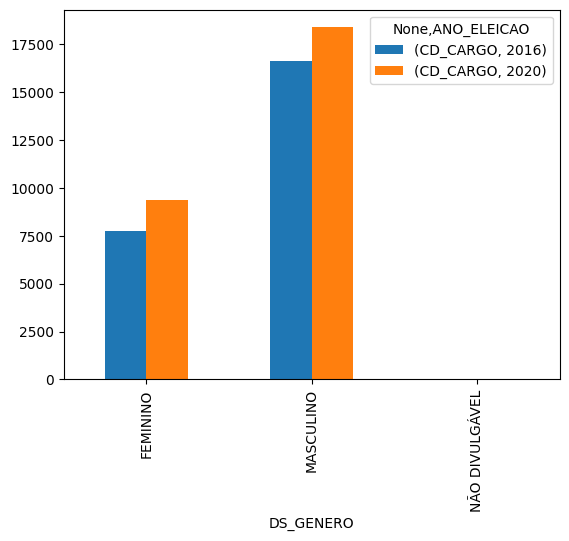

In [17]:
df_ano_genero.groupby(['ANO_ELEICAO', 'DS_GENERO']).sum().unstack(0).plot(kind="bar")

# Qual a faixa etária média das pessoas candidatas para a Câmara de Vereadores?

In [18]:
df_raca_genero.head()

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
0,2020,13,PE,17,PSL,4,FEMININO,3,PARDA,68.0,149376.80
1,2020,13,PE,15,MDB,2,MASCULINO,3,PARDA,51.0,48405.01
2,2020,13,PE,25,DEM,2,MASCULINO,1,BRANCA,58.0,1011149.65
3,2020,13,PE,45,PSDB,4,FEMININO,3,PARDA,49.0,26120.37
7,2020,13,PE,70,AVANTE,2,MASCULINO,3,PARDA,26.0,18991.16


In [19]:
df_raca_genero.describe()

,ANO_ELEICAO,CD_CARGO,NR_PARTIDO,CD_GENERO,CD_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA
count,52176.000000,52176.0,52176.000000,52176.000000,52176.000000,52175.000000,5.217600e+04
mean,2018.130711,13.0,33.530186,2.657582,2.160610,43.680824,7.703957e+04
std,1.995743,0.0,21.004875,0.940046,0.992971,12.088887,1.755014e+05
min,2016.000000,13.0,10.000000,-4.000000,-4.000000,18.000000,-4.000000e+00
25%,2016.000000,13.0,15.000000,2.000000,1.000000,35.000000,1.230775e+04
50%,2020.000000,13.0,25.000000,2.000000,3.000000,43.000000,2.292882e+04
75%,2020.000000,13.0,45.000000,4.000000,3.000000,51.000000,4.662495e+04
max,2020.000000,13.0,90.000000,4.000000,6.000000,999.000000,1.011150e+06


In [20]:
cortes = [18, 25, 35, 45, 55, 65, 100]
categorias = ['18 a 24 anos', '25 a 34 anos', '35 a 44 anos', '45 a 54 anos', '55 a 64 anos', 'acima de 64 anos']

In [31]:
df_raca_genero['FAIXA_ETARIA'] = pd.cut(df_raca_genero['NR_IDADE_DATA_POSSE'], cortes, labels=categorias, include_lowest=True)

In [37]:
df_raca_genero.sample(20)

,ANO_ELEICAO,CD_CARGO,SG_UF,NR_PARTIDO,SG_PARTIDO,CD_GENERO,DS_GENERO,CD_COR_RACA,DS_COR_RACA,NR_IDADE_DATA_POSSE,VR_DESPESA_MAX_CAMPANHA,FAIXA_ETARIA
4476,2020,13,PE,40,PSB,2,MASCULINO,2,PRETA,50.0,12307.75,45 a 54 anos
15055,2020,13,PE,90,PROS,2,MASCULINO,1,BRANCA,43.0,149376.80,35 a 44 anos
15763,2020,13,PE,13,PT,2,MASCULINO,2,PRETA,49.0,55870.31,45 a 54 anos
45044,2016,13,PE,23,PPS,4,FEMININO,1,BRANCA,41.0,16853.92,35 a 44 anos
56283,2016,13,PE,10,PRB,2,MASCULINO,3,PARDA,50.0,10803.91,45 a 54 anos
19446,2020,13,PE,11,PP,2,MASCULINO,3,PARDA,41.0,26666.50,35 a 44 anos
6355,2020,13,PE,15,MDB,2,MASCULINO,1,BRANCA,41.0,29696.26,35 a 44 anos
15781,2020,13,PE,40,PSB,2,MASCULINO,3,PARDA,48.0,12307.75,45 a 54 anos
26429,2016,13,RN,15,PMDB,2,MASCULINO,1,BRANCA,39.0,30044.06,35 a 44 anos
15140,2020,13,PE,23,CIDADANIA,2,MASCULINO,3,PARDA,49.0,30058.47,45 a 54 anos


In [33]:
df_raca_genero['FAIXA_ETARIA'].mode()

0    35 a 44 anos
Name: FAIXA_ETARIA, dtype: category
Categories (6, object): ['18 a 24 anos' < '25 a 34 anos' < '35 a 44 anos' < '45 a 54 anos' < '55 a 64 anos' < 'acima de 64 anos']

# Visualize graficamente a distribuição da variável DS_COR_RACA em 2016

In [24]:
df_raca_2016 = df_raca_genero[df_raca_genero['ANO_ELEICAO'] == 2016].copy()

In [25]:
df_raca_2016[['CD_COR_RACA', 'DS_COR_RACA']].groupby(['DS_COR_RACA']).count()

,CD_COR_RACA
DS_COR_RACA,
AMARELA,132
BRANCA,9956
INDÍGENA,89
NÃO DIVULGÁVEL,1
PARDA,12156
PRETA,2049


In [26]:
raca = df_raca_2016['DS_COR_RACA'].unique().tolist()
print(raca)

['BRANCA', 'PARDA', 'PRETA', 'INDÍGENA', 'AMARELA', 'NÃO DIVULGÁVEL']


In [27]:
frequencia = df_raca_2016['DS_COR_RACA'].value_counts().tolist()
print(frequencia)

[12156, 9956, 2049, 132, 89, 1]


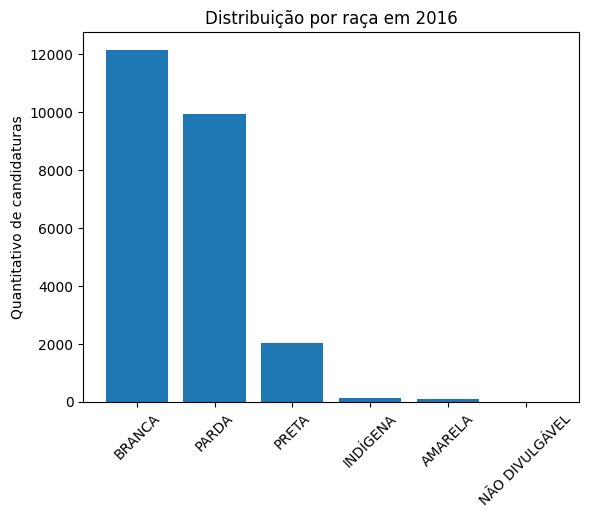

In [39]:
plt.bar(raca, frequencia)

plt.xticks(rotation=45) 
plt.title('Distribuição por raça em 2016')
plt.ylabel('Quantitativo de candidaturas')

plt.savefig('distribuicao_raca_2016.pdf')

# Há correlação entre idade, gênero e custo da campanha?

In [29]:
df_raca_genero[['NR_IDADE_DATA_POSSE', 'CD_GENERO', 'VR_DESPESA_MAX_CAMPANHA']].corr(method='pearson')

,NR_IDADE_DATA_POSSE,CD_GENERO,VR_DESPESA_MAX_CAMPANHA
NR_IDADE_DATA_POSSE,1.000000,-0.056293,0.072223
CD_GENERO,-0.056293,1.000000,-0.011992
VR_DESPESA_MAX_CAMPANHA,0.072223,-0.011992,1.000000
